# Bigmart Dataset - Project

## Importing relevant libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
sns.set_context('paper')

In [2]:
from sklearn.preprocessing import OneHotEncoder

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn import metrics
import statsmodels.api as sm
from sklearn.linear_model import Lasso, Ridge


## Loading Datasets

In [4]:
train = pd.read_csv("Train_UWu5bXk.csv")
test = pd.read_csv("Test_u94Q5KV.csv")

FileNotFoundError: [Errno 2] File Train_UWu5bXk.csv does not exist: 'Train_UWu5bXk.csv'

In [ ]:
# checking the shape of train
train.shape

In [462]:
# checking the shape of test
test.shape

(5681, 11)

In [463]:
train.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [464]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [465]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

### Checking if table as missing values

In [466]:
train.isnull().sum(axis=0)

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Item_Weight has 1463 and Outlet_Size has 2410 missing values

In [467]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Visualzing the data

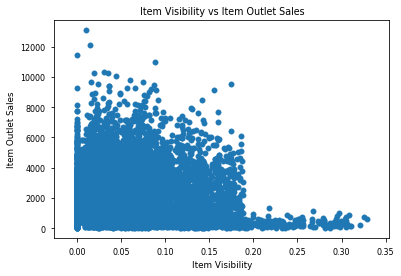

In [468]:
plt.scatter(train.Item_Visibility,train.Item_Outlet_Sales)
plt.xlabel("Item Visibility")
plt.ylabel("Item Outlet Sales")
plt.title("Item Visibility vs Item Outlet Sales")

plt.show()

**Items having visibility less than 0.2 sold them most**

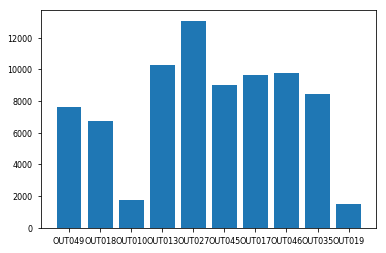

In [469]:
plt.bar(train.Outlet_Identifier,train.Item_Outlet_Sales)
plt.show()

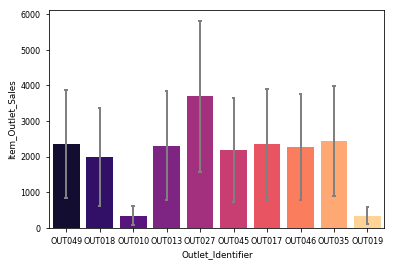

In [470]:
sns.barplot(x='Outlet_Identifier',y='Item_Outlet_Sales', data=train ,palette='magma',capsize = 0.05,saturation = 8,errcolor = 'gray', errwidth = 2,  
            ci = 'sd')
plt.show()

    .Top 2 Contributors: Outlet_27 > Outlet_35
    .Bottom 2 Contributors: Outlet 10 & Outlet 19

#### Checking which item type sold the most

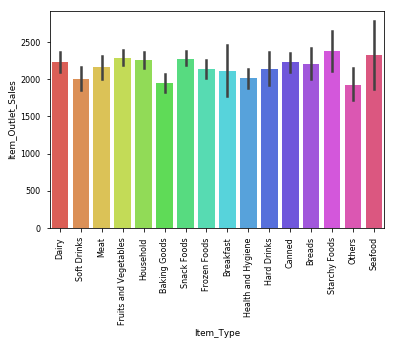

In [471]:
sns.barplot(x='Item_Type',y='Item_Outlet_Sales',data=train,palette='hls',saturation=8)
plt.xticks(rotation=90)
plt.show()

#### Using a boxplot to see the outliers in each item type

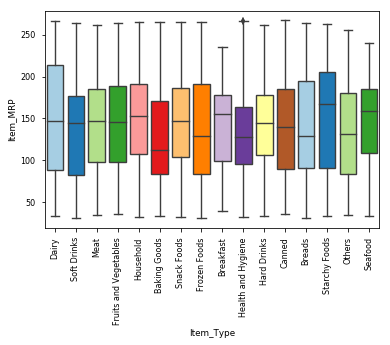

In [472]:
sns.boxplot(x='Item_Type',y='Item_MRP',data=train,palette='Paired',saturation=8)
plt.xticks(rotation=90)
plt.show()

    .Health and hygiene has an outlier

## Data Cleaning

In [473]:
train.Item_Fat_Content.value_counts() # has mismatched factor levels

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [474]:
train.Item_Visibility.value_counts()

0.000000    526
0.076975      3
0.041283      2
0.085622      2
0.187841      2
0.134976      2
0.107224      2
0.085275      2
0.076856      2
0.059836      2
0.112203      2
0.044024      2
0.072253      2
0.061271      2
0.061164      2
0.145266      2
0.081097      2
0.071958      2
0.103442      2
0.074613      2
0.072655      2
0.071833      2
0.136286      2
0.041355      2
0.026950      2
0.013952      2
0.160624      2
0.080640      2
0.097611      2
0.096592      2
           ... 
0.100641      1
0.122735      1
0.099024      1
0.054600      1
0.118859      1
0.162572      1
0.076745      1
0.015461      1
0.057655      1
0.042113      1
0.029565      1
0.066447      1
0.035954      1
0.083222      1
0.021413      1
0.030921      1
0.081119      1
0.052811      1
0.118080      1
0.046654      1
0.021469      1
0.060134      1
0.096658      1
0.019064      1
0.164197      1
0.092576      1
0.067544      1
0.115168      1
0.146896      1
0.050902      1
Name: Item_Visibility, L

**Item Visibility cant be 0**

In [475]:
train.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

### Quick observations from the dataset so far:
    1.Item_Fat_Content has mismatched faqctor levels
    2.Min(Item_visibility) = 0. Not practically posible. Treat 0’s as missing vals
    3.Item_weight has 1463 missing values
    4.Outlet_Size has unmatched factor levels

**MY Code**

In [476]:
test['Item_Outlet_Sales'] = 1
test.Item_Outlet_Sales.head()

0    1
1    1
2    1
3    1
4    1
Name: Item_Outlet_Sales, dtype: int64

In [477]:
train_copy = train.copy()
test_copy = test.copy()

In [478]:
combined = pd.concat([train,test])
combined.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Filling outlet size
#### My opinion: Outlet size depends on outlet type and the location of the outlet

In [479]:
crosstable = pd.crosstab(train['Outlet_Size'],train['Outlet_Type'])
crosstable

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,,,,
High,0,932,0,0
Medium,0,930,928,935
Small,528,1860,0,0


**From the above table it is evident that all the grocery stores are of small types, whcih is mostly true in the real world.**

**Therefore mapping Grocery store and small size**

In [480]:
train.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [481]:
dic = {'Grocery Store':'Small'}
s = train.Outlet_Type.map(dic)

In [482]:
train.Outlet_Size= train.Outlet_Size.combine_first(s)
train.Outlet_Size.value_counts()

Small     2943
Medium    2793
High       932
Name: Outlet_Size, dtype: int64

In [483]:
train.isnull().sum(axis=0)

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1855
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

**In real world it is mostly seen that outlet size varies with the location of the outlet, hence checking betwwen the same**

In [484]:
#checking for location type
crosstable = pd.crosstab(train.Outlet_Size,train.Outlet_Location_Type)
crosstable

Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Outlet_Size,,,
High,0,0,932
Medium,930,0,1863
Small,1458,930,555


**From the above table it is evident that all the Tier 2 stores are of small types**

**Therefore mapping Tier 2 store and small size**

In [485]:
dic = {"Tier 2":"Small"}
s = train.Outlet_Location_Type.map(dic)
train.Outlet_Size = train.Outlet_Size.combine_first(s)
train.Outlet_Size.value_counts()

Small     4798
Medium    2793
High       932
Name: Outlet_Size, dtype: int64

In [486]:
train.isnull().sum(axis=0)

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [487]:
train.Item_Identifier.value_counts().sum()

8523

**Outlet size missing values have been imputed**

**Instead of imputing with the overall mean of all the items. It would be better to impute it with the mean of particular item type - Food,Dricks,Non-Consumable. Did this as some products may be on the heavier side and some on the lighter.**

In [488]:
#Fill missing values of weight of Item According to means of Item Identifier
train['Item_Weight']=train['Item_Weight'].fillna(train.groupby('Item_Identifier')['Item_Weight'].transform('mean'))
train.isnull().sum()

Item_Identifier              0
Item_Weight                  4
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [489]:
train[train.Item_Weight.isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


**The above 4 item weights werent imputed because in the dataset there is only one record for each of them. Hence mean could not be caculated**

**So, we will fill Item_Weight by the corresponding Item_Type for these 4 values**

In [490]:
# List of item types 
item_type_list = train.Item_Type.unique().tolist()
item_type_list

['Dairy',
 'Soft Drinks',
 'Meat',
 'Fruits and Vegetables',
 'Household',
 'Baking Goods',
 'Snack Foods',
 'Frozen Foods',
 'Breakfast',
 'Health and Hygiene',
 'Hard Drinks',
 'Canned',
 'Breads',
 'Starchy Foods',
 'Others',
 'Seafood']

In [491]:
# grouping based on item type and calculating mean of item weight
Item_Type_Means = train.groupby('Item_Type')['Item_Weight'].mean() 

In [492]:
Item_Type_Means

Item_Type
Baking Goods             12.285317
Breads                   11.297689
Breakfast                12.779727
Canned                   12.403320
Dairy                    13.379905
Frozen Foods             12.782404
Fruits and Vegetables    13.236713
Hard Drinks              11.456238
Health and Hygiene       13.052327
Household                13.524780
Meat                     12.771212
Others                   13.979438
Seafood                  12.521953
Snack Foods              13.031230
Soft Drinks              11.879775
Starchy Foods            13.841385
Name: Item_Weight, dtype: float64

In [493]:
# Mapiing Item weight to item type mean
for i in item_type_list:
    dic = {i:Item_Type_Means[i]}
    s = train.Item_Type.map(dic)
    train.Item_Weight = train.Item_Weight.combine_first(s)
    
Item_Type_Means = train.groupby('Item_Type')['Item_Weight'].mean() 

train.isnull().sum()

    

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [494]:
Item_Type_Means

Item_Type
Baking Goods             12.285317
Breads                   11.297689
Breakfast                12.779727
Canned                   12.403320
Dairy                    13.379905
Frozen Foods             12.782404
Fruits and Vegetables    13.236713
Hard Drinks              11.456238
Health and Hygiene       13.052327
Household                13.524780
Meat                     12.771212
Others                   13.979438
Seafood                  12.521953
Snack Foods              13.031230
Soft Drinks              11.879775
Starchy Foods            13.841385
Name: Item_Weight, dtype: float64

**Missing values for item_weight have been imputed**

In [495]:
train.Item_Weight.isnull().any() # no missing values

False

### Imputing for item visibility

Item visibility cannot be 0 and should be treated as missing values and imputed

In [496]:
train.Item_Visibility.value_counts().head() # There are 526 values with 0 Item visibility

0.000000    526
0.076975      3
0.041283      2
0.085622      2
0.187841      2
Name: Item_Visibility, dtype: int64

**Imputing with mean of item_visibility of particular item identifier category as some items may be more visible (big - TV,Fridge etc) and some less visible (Shampoo Sachet,Surf Excel and other such small pouches)**

In [497]:
# Replacing 0's with NaN
train.Item_Visibility.replace(to_replace=0.000000,value=np.NaN,inplace=True)
# Now fill by mean of visbility based on item identifiers
train.Item_Visibility = train.Item_Visibility.fillna(train.groupby('Item_Identifier')['Item_Visibility'].transform('mean'))


In [498]:
train.Item_Visibility.value_counts().head()

0.121880    4
0.082138    3
0.016164    3
0.029511    3
0.081428    3
Name: Item_Visibility, dtype: int64

In [499]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

**Renaming Item_Fat_Content levels**

In [500]:
train.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [501]:
train.Item_Fat_Content.replace(to_replace=["LF","low fat"],value="Low Fat",inplace=True)
train.Item_Fat_Content.replace(to_replace="reg",value="Regular",inplace=True)

train.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [502]:
train['Outlet_Year'] = (2013 - train.Outlet_Establishment_Year)

In [503]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Year
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14
3,FDX07,19.20,Regular,0.022911,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,15
4,NCD19,8.93,Low Fat,0.016164,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,26


### Encoding Categorical Variables

In [504]:
var_cat = train.select_dtypes(include=[object])
var_cat.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,Small,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


In [505]:
#Convert categorical into numerical 
var_cat = var_cat.columns.tolist()
var_cat = ['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

var_cat

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [506]:
train['Item_Type_New'] = train.Item_Identifier
train.Item_Type_New.head(10)

0    FDA15
1    DRC01
2    FDN15
3    FDX07
4    NCD19
5    FDP36
6    FDO10
7    FDP10
8    FDH17
9    FDU28
Name: Item_Type_New, dtype: object

In [507]:
train.Item_Type_New.replace(to_replace="^FD*.*",value="Food",regex=True,inplace=True)
train.Item_Type_New.replace(to_replace="^DR*.*",value="Drinks",regex=True,inplace=True)
train.Item_Type_New.replace(to_replace="^NC*.*",value="Non-Consumable",regex=True,inplace=True)

train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Year,Item_Type_New
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,4,Drinks
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14,Food
3,FDX07,19.20,Regular,0.022911,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,15,Food
4,NCD19,8.93,Low Fat,0.016164,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,26,Non-Consumable


In [508]:
le = LabelEncoder()

In [509]:
train['Outlet'] = le.fit_transform(train.Outlet_Identifier)
train['Item'] = le.fit_transform(train.Item_Type_New)
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Year,Item_Type_New,Outlet,Item
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14,Food,9,1
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,4,Drinks,3,0
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14,Food,9,1
3,FDX07,19.20,Regular,0.022911,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,15,Food,0,1
4,NCD19,8.93,Low Fat,0.016164,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,26,Non-Consumable,1,2


In [510]:
for i in var_cat:
    train[i] = le.fit_transform(train[i])

train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Year,Item_Type_New,Outlet,Item
0,FDA15,9.30,0,0.016047,4,249.8092,OUT049,1999,1,0,1,3735.1380,14,Food,9,1
1,DRC01,5.92,1,0.019278,14,48.2692,OUT018,2009,1,2,2,443.4228,4,Drinks,3,0
2,FDN15,17.50,0,0.016760,10,141.6180,OUT049,1999,1,0,1,2097.2700,14,Food,9,1
3,FDX07,19.20,1,0.022911,6,182.0950,OUT010,1998,2,2,0,732.3800,15,Food,0,1
4,NCD19,8.93,0,0.016164,9,53.8614,OUT013,1987,0,2,1,994.7052,26,Non-Consumable,1,2


In [511]:
#Visualizing Correlation
corrmat = train.corr()
corrmat

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Year,Outlet,Item
Item_Weight,1.000000,-0.026797,-0.021226,0.035710,0.025967,-0.013417,-0.012445,0.002973,0.000592,0.013198,0.013417,-0.007586,0.071585
Item_Fat_Content,-0.026797,1.000000,0.052620,-0.139434,0.006063,0.003151,-0.001262,-0.001598,0.002199,0.018719,-0.003151,0.000764,-0.166111
Item_Visibility,-0.021226,0.052620,1.000000,-0.042400,-0.005951,-0.075238,0.090322,-0.030449,-0.170752,-0.126026,0.075238,-0.096282,-0.050520
Item_Type,0.035710,-0.139434,-0.042400,1.000000,0.032651,0.004970,-0.000218,0.003084,0.003053,0.017048,-0.004970,0.001656,0.007456
Item_MRP,0.025967,0.006063,-0.005951,0.032651,1.000000,0.005020,0.000872,0.000232,-0.001975,0.567574,-0.005020,0.003319,0.032517
Outlet_Establishment_Year,-0.013417,0.003151,-0.075238,0.004970,0.005020,1.000000,0.425534,-0.089216,-0.122304,-0.049135,-1.000000,0.079035,-0.008551
Outlet_Size,-0.012445,-0.001262,0.090322,-0.000218,0.000872,0.425534,1.000000,-0.480075,-0.401373,-0.162753,-0.425534,0.260272,-0.001276
Outlet_Location_Type,0.002973,-0.001598,-0.030449,0.003084,0.000232,-0.089216,-0.480075,1.000000,0.467219,0.089367,0.089216,-0.716176,0.007661
Outlet_Type,0.000592,0.002199,-0.170752,0.003053,-0.001975,-0.122304,-0.401373,0.467219,1.000000,0.401522,0.122304,0.099873,0.001136
Item_Outlet_Sales,0.013198,0.018719,-0.126026,0.017048,0.567574,-0.049135,-0.162753,0.089367,0.401522,1.000000,0.049135,0.162325,0.011236


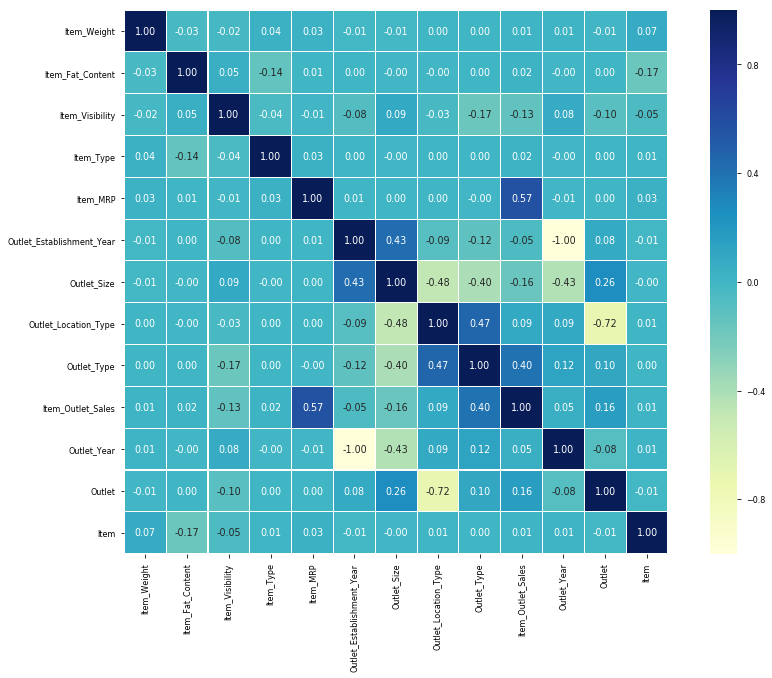

In [512]:
f,ax = plt.subplots(figsize = (15,10))
sns.heatmap(corrmat,annot=True,ax=ax,cmap="YlGnBu",linewidths=0.1,fmt=".2f",square=True)
plt.show()

# Predictive Modelling

In [559]:
predictors=['Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Size','Outlet_Location_Type','Outlet_Type','Outlet_Year',
            'Outlet','Item','Item_Weight']

In [560]:
seed = 240
np.random.seed(seed)

In [561]:
X = train[predictors]
y = train.Item_Outlet_Sales

In [562]:
X.head()

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Year,Outlet,Item,Item_Weight
0,0,0.016047,4,249.8092,1,0,1,14,9,1,9.30
1,1,0.019278,14,48.2692,1,2,2,4,3,0,5.92
2,0,0.016760,10,141.6180,1,0,1,14,9,1,17.50
3,1,0.022911,6,182.0950,2,2,0,15,0,1,19.20
4,0,0.016164,9,53.8614,0,2,1,26,1,2,8.93


In [563]:
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [564]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 42)

In [565]:
X_train.shape

(6392, 11)

In [566]:
X_train.tail()

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Year,Outlet,Item,Item_Weight
5734,1,0.286345,6,139.1838,2,2,0,15,0,1,9.395
5191,0,0.117575,5,75.6670,2,1,1,6,2,1,15.600
5390,0,0.018944,8,237.3590,2,1,1,11,7,2,17.600
860,0,0.054363,13,117.9466,2,1,1,6,2,1,20.350
7270,0,0.016993,9,95.7410,2,0,1,16,8,2,16.350


In [567]:
X_test.shape

(2131, 11)

In [568]:
y_train.tail()

5734     280.9676
5191    1301.6390
5390    6145.3340
860     1649.8524
7270     965.4100
Name: Item_Outlet_Sales, dtype: float64

In [569]:
y_test.tail()

4753    3793.7284
4836    2410.8618
8064    5309.7550
4418    2530.7058
1784    4138.6128
Name: Item_Outlet_Sales, dtype: float64

In [570]:
y_train.shape

(6392,)

In [571]:
y_test.shape

(2131,)

In [572]:
lm = LinearRegression()

In [573]:
model = lm.fit(X_train,y_train)
predictions = lm.predict(X_test)

In [574]:
predictions[:5]

array([1008.45407221,  694.2737362 , 1001.31600703, 4258.41831096,
       3063.11801929])

## Plotting the model

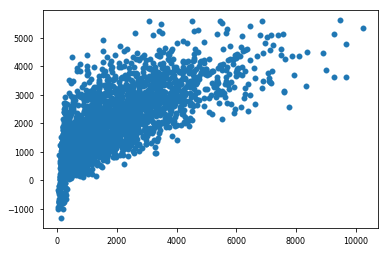

In [575]:
plt.scatter(y_test,predictions)
plt.show()

In [576]:
#Accuracy Score
print("Linear Regression Model Score:",model.score(X_test,y_test))

Linear Regression Model Score: 0.5052133696581114


In [577]:
original_values = y_test

In [578]:
#Root mean squared error
rmse = np.sqrt(metrics.mean_squared_error(original_values,predictions))

In [579]:
print("Linear Regression R2 score: ",metrics.r2_score(original_values,predictions))

Linear Regression R2 score:  0.5052133696581114


In [580]:
print("Linear Regression RMSE: ", rmse)

Linear Regression RMSE:  1168.377111819492


**Linear Regression wihtout cross validation:**

    Linear Regression R2 score:  0.505
    Linear Regression RMSE:  1168.37

    

In [581]:
# Linear Regression with statsmodels
x = sm.add_constant(X_train)
results = sm.OLS(y_train,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     584.9
Date:                Sun, 21 Jun 2020   Prob (F-statistic):               0.00
Time:                        21:47:11   Log-Likelihood:                -54463.
No. Observations:                6392   AIC:                         1.090e+05
Df Residuals:                    6380   BIC:                         1.090e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 -841.4599    129.806     -6.482      0.000   -1095.923    -586.996
Item_Fat_Content        81.1896     32.592      2.491      0.013      17.299     145.081
Item_Visibility      -1581.9458    314.339     -5.033      0.000   -2198.156    -965.735
Item_Type                0.1367      3.663      0.037      0.970      -7.044       7.317
Item_MRP                15.6333      0.243     64.333      0.000      15.157      16.110
Outlet_Size           -151.9287     29.168     -5.209      0.000    -209.107     -94.750
Outlet_Location_Type   -96.7356     43.708     -2.213      0.027    -182.418     -11.053
Outlet_Type            819.6678     31.057     26.392      0.000     758.785     880.550
Outlet_Year             -0.2265      2.053     -0.110      0.912      -4.251       3.798
Outlet                  59.5489     10.906      5.460      0.000      38.169      80.929
Item                     5.5255     29.549      0.187      0.852     -52.400      63.451
Item_Weight             -2.5387      3.292     -0.771      0.441      -8.993       3.915
==============================================================================
Omnibus:                      589.676   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1183.869
Skew:                           0.608   Prob(JB):                    8.44e-258
Kurtosis:                       4.722   Cond. No.                     3.25e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.25e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [582]:
predictions = results.predict(x)
predictions.head()

4776    4563.612802
7510    3386.056074
5828    2623.734246
5327    1182.020927
4810    1812.940626
dtype: float64

In [583]:
predictionsDF = pd.DataFrame({"Predictions":predictions})
joined = x.join(predictionsDF)
joined.head()

,const,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Year,Outlet,Item,Item_Weight,Predictions
4776,1.0,0,0.029565,9,256.4646,1,2,2,4,3,2,16.350,4563.612802
7510,1.0,1,0.065917,13,179.7660,1,2,2,4,3,1,15.250,3386.056074
5828,1.0,1,0.158716,10,157.2946,1,0,1,14,9,1,12.350,2623.734246
5327,1.0,0,0.014628,0,82.3250,2,1,1,9,6,1,7.975,1182.020927
4810,1.0,0,0.016645,5,120.9098,2,1,1,11,7,1,19.350,1812.940626


### Performing Croass Validation

In [584]:
# Perform 6-fold cross validat
score = cross_val_score(model,X,y,cv=5)
print("Linear Regression Cross Validated Score: ",score)

Linear Regression Cross Validated Score:  [0.51828865 0.5023478  0.48262104 0.50311721 0.4998021 ]


In [585]:
#Predicting with cross_val_predict
predictions = cross_val_predict(model,X,y,cv=6)
predictions[:5]

array([4176.33789161, 1411.34617329, 2489.52441577, 1484.81451779,
        620.00074558])

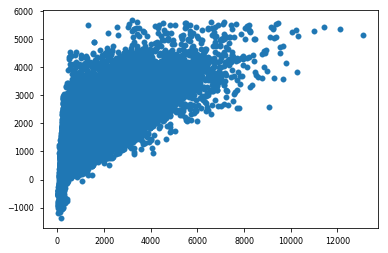

In [586]:
plt.scatter(y,predictions)
plt.show()

In [587]:
accuracy = metrics.r2_score(y,predictions)
print("Linear Regression R2 with CV: ",accuracy)

Linear Regression R2 with CV:  0.501285827374488


In [588]:
rmse = np.sqrt(metrics.mean_squared_error(y,predictions))
print("Linear Regression RMSE with CV:",rmse)

Linear Regression RMSE with CV: 1205.0541721930067


**Linear Regression with Cross- Validation**

    Linear Regression R2 with CV: 0.501
    Linear Regression RMSE with CV: 1205.05

### Using KFold Validation

In [589]:
def calc_metrics(X_train, y_train, X_test, y_test, model):
    '''fits model and returns the RMSE for in-sample error and out-of-sample error'''
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_test, y_test, model)
    return train_error, validation_error

In [590]:
def calc_train_error(X_train, y_train, model):
    '''returns in-sample error for already fit model.'''
    predictions = model.predict(X_train)
    mse = metrics.mean_squared_error(y_train, predictions)
    rmse = np.sqrt(mse)
    return mse
    
def calc_validation_error(X_test, y_test, model):
    '''returns out-of-sample error for already fit model.'''
    predictions = model.predict(X_test)
    mse = metrics.mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    return mse

In [591]:
kf = KFold(n_splits=10,random_state=1)
kf.get_n_splits(X)

10

In [592]:
print(kf)

KFold(n_splits=10, random_state=1, shuffle=False)


In [593]:
alphas = [1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1]
for alpha in alphas:
    train_errors = []
    validation_errors = []
    for train_index,val_index in kf.split(X_train,y_train):
        X_train,X_val = X.iloc[train_index],X.iloc[val_index]
        y_train,y_val = y.iloc[train_index],y.iloc[val_index]

        # Instantiate Model
        lasso_model = Lasso(alpha=alpha,fit_intercept=True,random_state=77)

        #Caculate Errors
        train_error,val_error = calc_metrics(X_train,y_train,X_val,y_val,lasso_model)

        # append to list
        train_errors.append(train_error)
        validation_errors.append(val_error)
    # generate report

    print('alpha: {:6} | mean(train_error): {:7} | mean(val_error): {}'.
          format(alpha,
                 round(np.mean(train_errors),4),
                 round(np.mean(validation_errors),4)))

alpha: 0.0001 | mean(train_error): 1422039.8273 | mean(val_error): 1428622.8128
alpha:  0.001 | mean(train_error): 1429417.1653 | mean(val_error): 1436695.3433
alpha:   0.01 | mean(train_error): 1421688.9473 | mean(val_error): 1430946.0224
alpha:    0.1 | mean(train_error): 1422763.8003 | mean(val_error): 1432629.1168
alpha:      1 | mean(train_error): 1432112.8966 | mean(val_error): 1440583.5172
alpha:   10.0 | mean(train_error): 1448763.2857 | mean(val_error): 1456152.8539


### Decision Tree Regressor

In [594]:
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [595]:
predictions = regressor.predict(X_test)
predictions[:5]

array([ 792.302 ,  356.8688,  365.5242, 5778.4782, 2356.932 ])

In [596]:
results = pd.DataFrame({'Actual':y_test,'Predicted':predictions})
results.head()

,Actual,Predicted
7503,1743.0644,792.3020
2957,356.8688,356.8688
7031,377.5086,365.5242
1084,5778.4782,5778.4782
856,2356.9320,2356.9320


In [597]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error: 625.8888673862036
Mean Squared Error: 1348868.2253540761
Root Mean Squared Error: 1161.4078634803866


### Decision Tree Regression with Kfold validation
    Mean Absolute Error: 625.8888673862036
    Mean Squared Error: 1348868.2253540761
    Root Mean Squared Error: 1161.4078634803866


### Random Forest Regressor

In [598]:
rf = RandomForestRegressor(random_state=43)

In [599]:
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=43, verbose=0, warm_start=False)

In [600]:
predictions = rf.predict(X_test)
predictions[:5]

array([ 695.36152,  446.15258,  584.37266, 5160.88212, 2426.24178])

In [601]:
rmse = np.sqrt(metrics.mean_squared_error(y_test,predictions))
rmse

946.3433457493312

In [602]:
print(metrics.r2_score(y_test,predictions))

0.6753993836766958


In [603]:
results = pd.DataFrame({'Actual':y_test,'Predicted':predictions})
results.head()

,Actual,Predicted
7503,1743.0644,695.36152
2957,356.8688,446.15258
7031,377.5086,584.37266
1084,5778.4782,5160.88212
856,2356.9320,2426.24178


### Randorm Forest Regression with kfold validation score
    RMSE: 946.34
    R2 Score: 0.675

# References

[Model Tuning Reference](https://dziganto.github.io/cross-validation/data%20science/machine%20learning/model%20tuning/python/Model-Tuning-with-Validation-and-Cross-Validation/)

[Towards Data Science](http://towardsdatascience.com/)

[Sklearn Documentation](https://scikit-learn.org/stable/)

[Stackoverflow](https://stackoverflow.com/)

